[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_ultralytics.ipynb)

## 0. Preperation

- Install latest version of SAHI and ultralytics:

In [ ]:
!pip install -U torch sahi ultralytics
!pip install ipywidgets

In [ ]:
#import os
#os.getcwd()

- Import required modules:

In [1]:
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download two test images:

In [2]:
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')
download_from_url('https://ultralytics.com/images/boats.jpg', 'demo_data/obb_test_image.png')

## 1. Standard Inference with an Ultralytics Model

- Instantiate a detection model by defining model weight path and other parameters:

In [2]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path="yolo11n.pt", # any yolov8/yolov9/yolo11/yolo12/rt-detr det model is supported
    confidence_threshold=0.35,
    device="cpu", # or 'cuda:0' if GPU is available
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [3]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [10]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

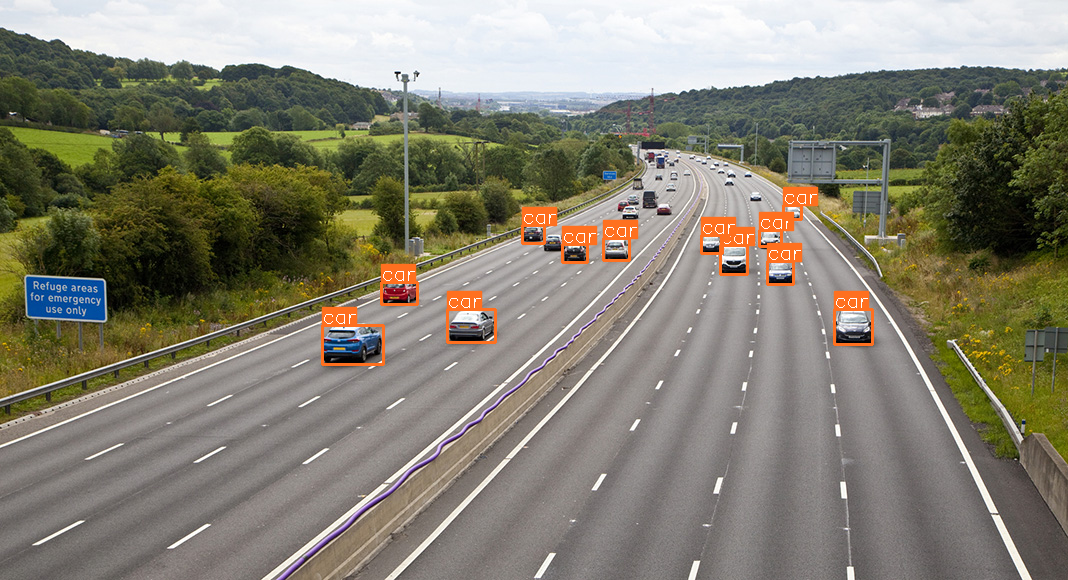

In [4]:
result.export_visuals(export_dir="demo_data/", hide_conf=True)

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv8/YOLO11 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [5]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


- Visualize predicted bounding boxes and masks over the original image:

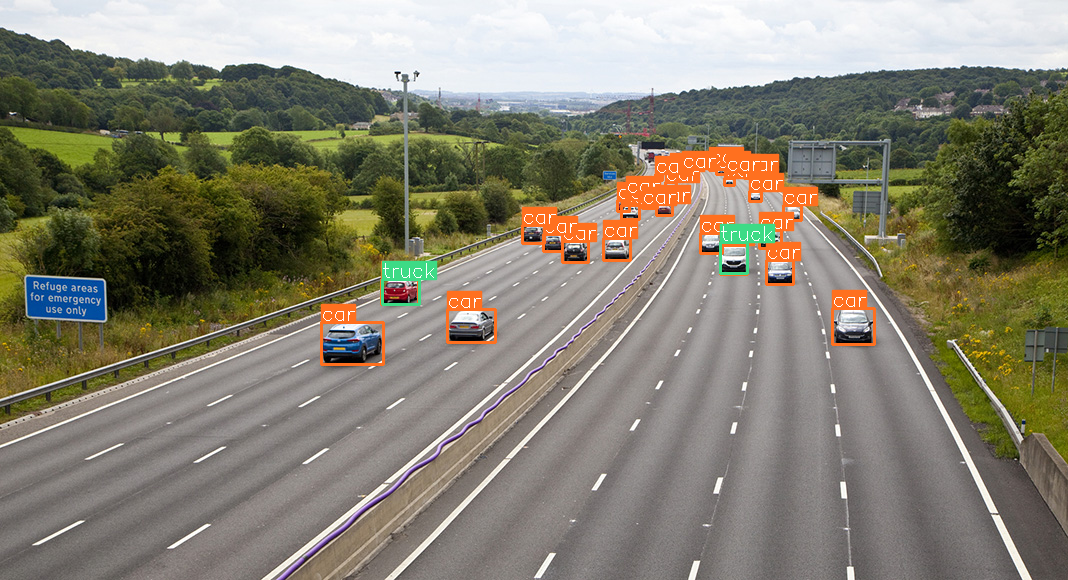

In [6]:
result.export_visuals(export_dir="demo_data/", hide_conf=True)

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447.674072265625, 309.57244873046875, 495.7220458984375, 342.06915283203125), w: 48.0479736328125, h: 32.4967041015625>,
    mask: None,
    score: PredictionScore: <value: 0.8857606053352356>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [ ]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.674072265625,
   309.57244873046875,
   48.0479736328125,
   32.4967041015625],
  'score': 0.8857606053352356,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1561},
 {'image_id': None,
  'bbox': [321.2298278808594,
   322.0831069946289,
   61.74859619140625,
   41.10980987548828],
  'score': 0.872576892375946,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2538},
 {'image_id': None,
  'bbox': [832.658935546875,
   308.4786148071289,
   41.4306640625,
   36.40044403076172],
  'score': 0.8661476373672485,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1508}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [8]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.7891845703125,
   309.07598876953125,
   47.58802032470703,
   33.136810302734375],
  'score': 0.9221271276473999,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1576},
 {'image_id': 1,
  'bbox': [832.6661224365234,
   308.70198822021484,
   41.41694641113281,
   36.017311096191406],
  'score': 0.8925901055335999,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1491},
 {'image_id': 1,
  'bbox': [766.1792449951172,
   260.6599998474121,
   27.710586547851562,
   23.558719635009766],
  'score': 0.8334103226661682,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 652}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
!pip install imantics
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [ ]:
!pip install fiftyone
result.to_fiftyone_detections()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [7]:
model_type = "ultralytics"
model_path = 'yolo11n.pt'
model_device = "cpu" # or 'cuda:0' if GPU is available
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [8]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 4 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/4 [00:00<?, ?it/s]

Performing prediction on 60 slices.


Performing inference on images:  25%|██▌       | 1/4 [00:01<00:05,  1.82s/it]

Prediction time is: 1737.92 ms
Performing prediction on 15 slices.


Performing inference on images:  50%|█████     | 2/4 [00:02<00:02,  1.01s/it]

Prediction time is: 390.09 ms
Performing prediction on 15 slices.


Performing inference on images:  75%|███████▌  | 3/4 [00:02<00:00,  1.32it/s]

Prediction time is: 420.70 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

Prediction time is: 524.14 ms
Prediction results are successfully exported to runs\predict\exp5


# 5 Sliced Segmentation

Run the same steps for YOLO11 segmentation model:

In [3]:
detection_model_seg = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path='yolo11n-seg.pt', # any yolov8/yolov9/yolo11/yolo12 seg model is supported
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0' if GPU is available
)

im = read_image("demo_data/small-vehicles1.jpeg")

- Perform standard segmentation:

In [4]:
result = get_prediction(im, detection_model_seg)

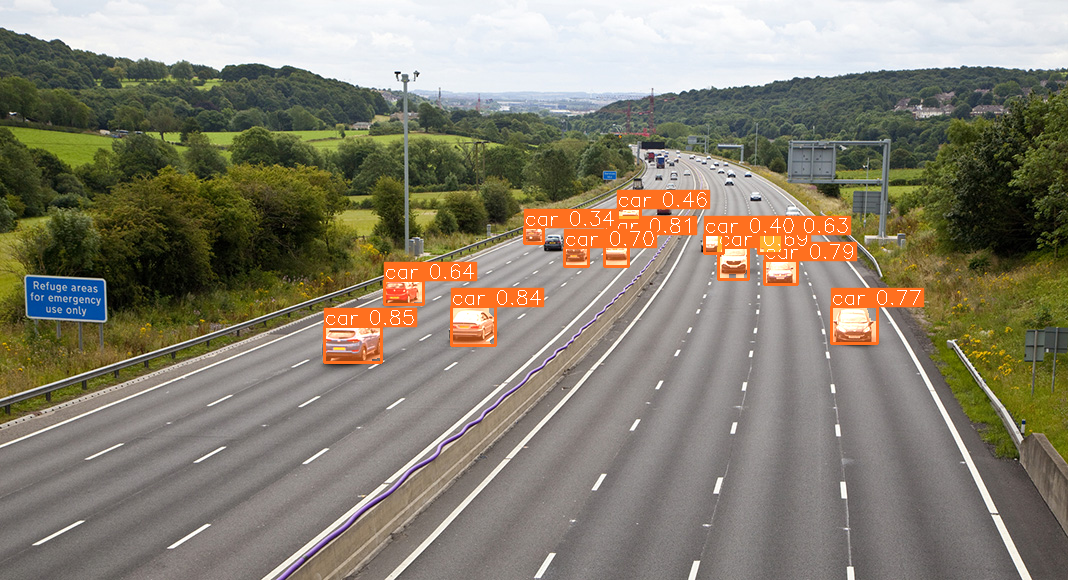

In [11]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

- Repeat for sliced segmentation:

In [5]:
result = get_sliced_prediction(
    im,
    detection_model_seg,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


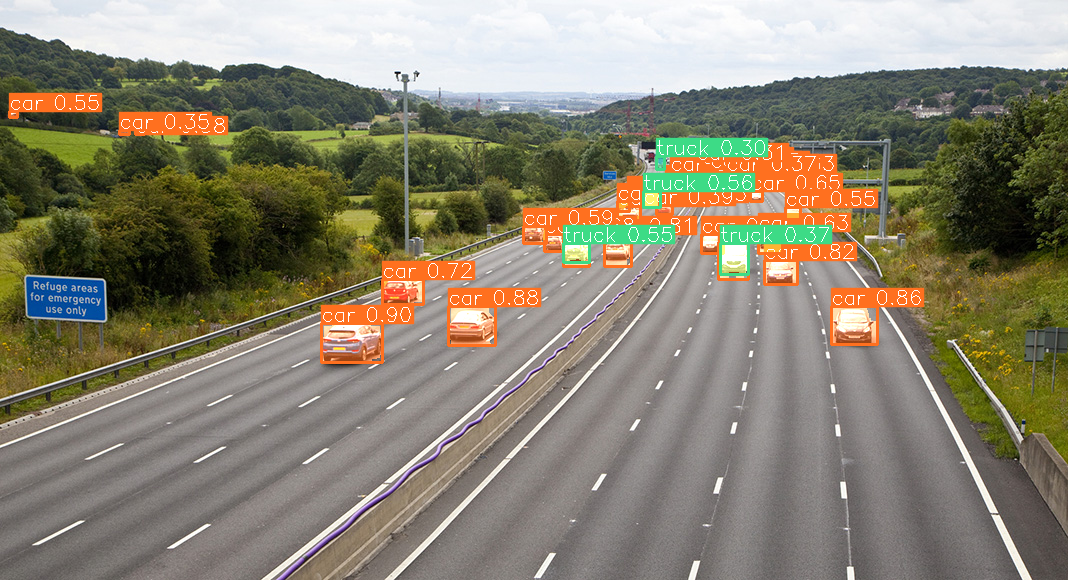

In [6]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

Sliced predictions are much better!

- Observe the prediction format:

In [ ]:
object_prediction_list = result.object_prediction_list
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(833, 309, 873, 343), w: 40, h: 34>,
    mask: <sahi.annotation.Mask object>,
    score: PredictionScore: <value: 0.9211080074310303>,
    category: Category: <id: 2, name: car>>

In [ ]:
object_prediction_list[0].mask.segmentation

[[837,
  313,
  836,
  313,
  836,
  315,
  835,
  316,
  835,
  317,
  835,
  318,
  834,
  319,
  833,
  320,
  833,
  336,
  834,
  337,
  834,
  338,
  834,
  339,
  835,
  340,
  835,
  341,
  836,
  342,
  837,
  342,
  841,
  342,
  846,
  342,
  863,
  342,
  864,
  343,
  869,
  343,
  870,
  343,
  871,
  342,
  871,
  340,
  872,
  340,
  872,
  339,
  873,
  338,
  873,
  323,
  873,
  321,
  873,
  320,
  872,
  319,
  872,
  318,
  871,
  318,
  866,
  313,
  867,
  312,
  865,
  310,
  863,
  310,
  862,
  309,
  841,
  309,
  840,
  309,
  839,
  310,
  839,
  311,
  838,
  311,
  838,
  312]]

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|                                                | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  33%|█████████████▎                          | 1/3 [00:01<00:03,  1.74s/it]

Prediction time is: 1615.49 ms
Performing prediction on 15 slices.


Performing inference on images:  67%|██████████████████████████▋             | 2/3 [00:03<00:01,  1.70s/it]

Prediction time is: 1593.49 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|████████████████████████████████████████| 3/3 [00:05<00:00,  1.86s/it]

Prediction time is: 2070.87 ms
Prediction results are successfully exported to runs/predict/exp9


# 7 Sliced OBB Prediction


In [7]:
detection_model_obb = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path='yolo11n-obb.pt', # any yolov8/yolov9/yolo11/yolo12 obb model is supported
    confidence_threshold=0.3,
    device="cuda:0", # or 'cuda:0' if GPU is available
)

im = read_image("demo_data/obb_test_image.png")


In [8]:
result = get_sliced_prediction(
    im,
    detection_model_obb,
    slice_height = 512,
    slice_width = 512,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
    #perform_standard_pred = False
)

Performing prediction on 15 slices.


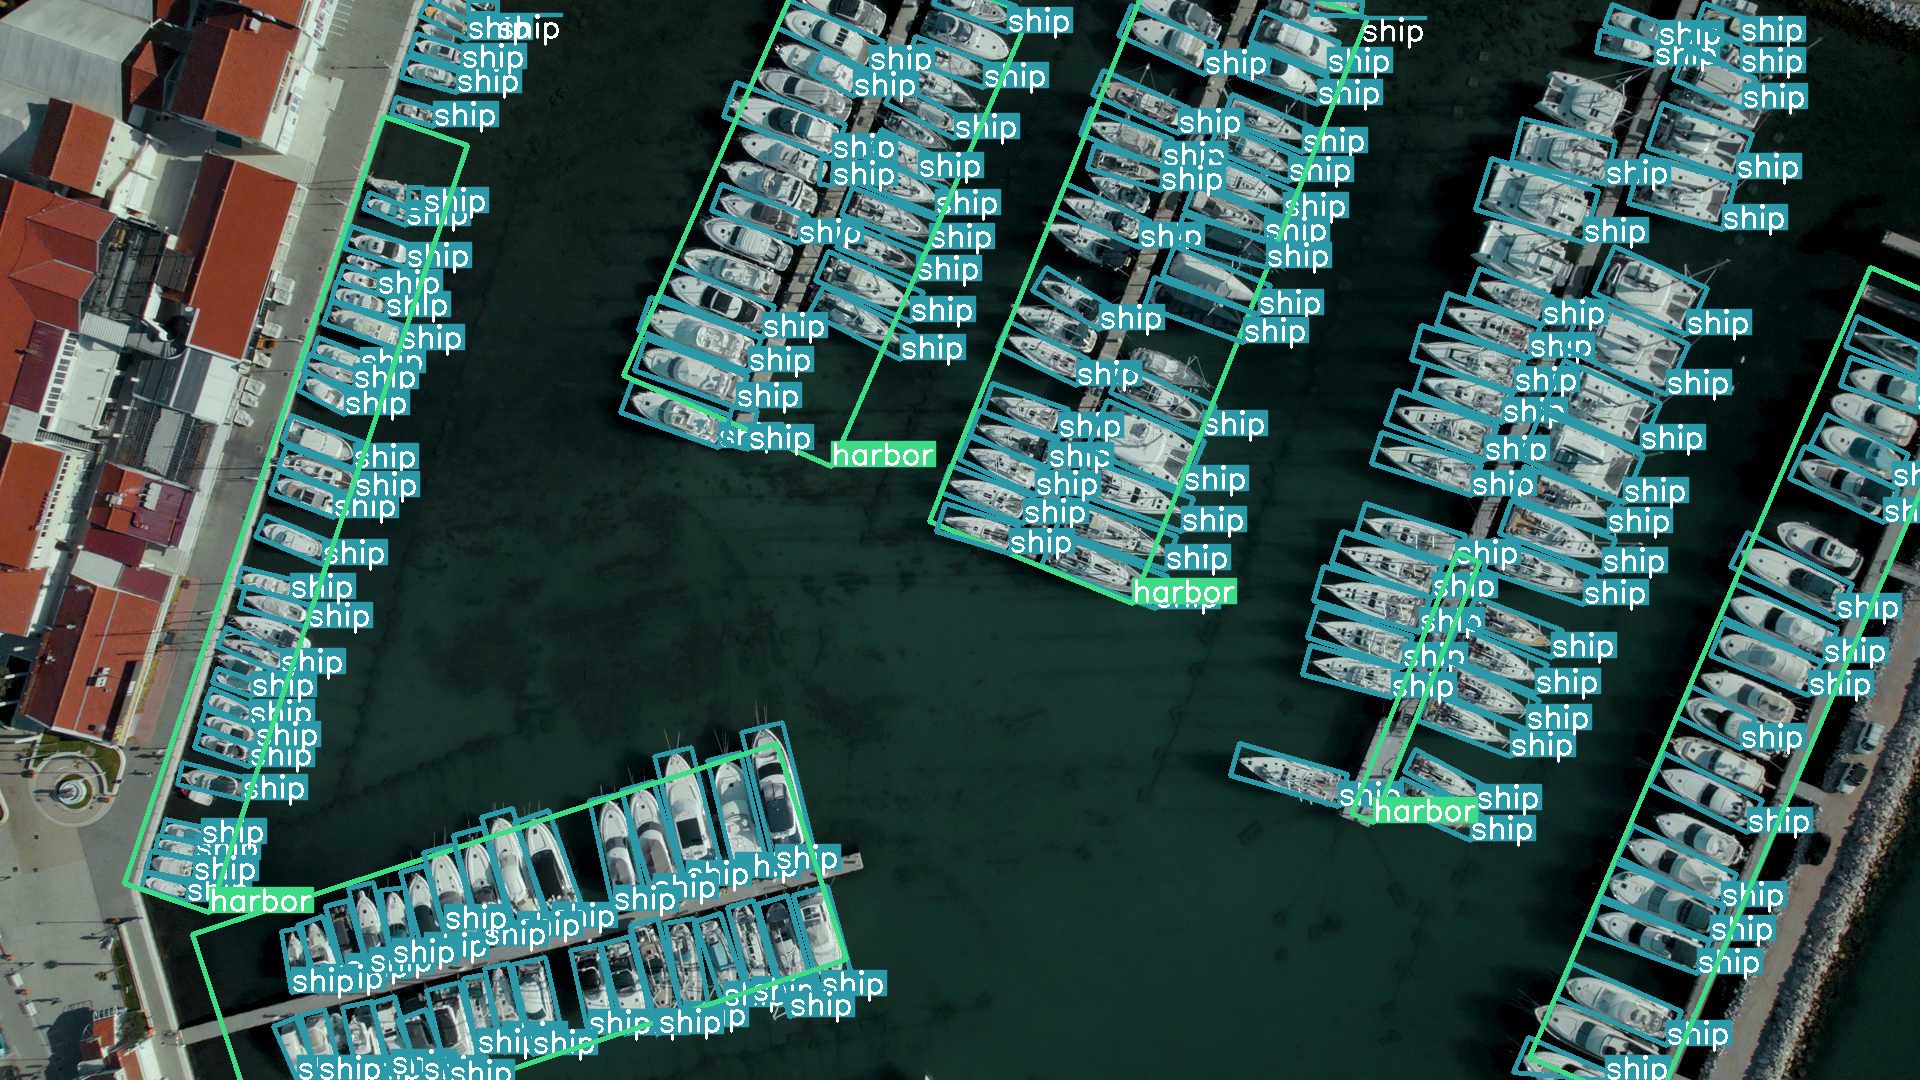

In [9]:
result.export_visuals(export_dir="demo_data/", text_size=1, rect_th=3, hide_conf=True)

Image("demo_data/prediction_visual.png", width=800)